# Functions to plot performance metrics

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [3]:
# Function to plot confusion matrix. This prevents notebooks from printing the plot twice.
def plot_confusion(t_class, p_class, title, cmap='turbo', report=True, **kwargs):

    # Define plot design
    title = title
    title_size = 'xx-large'
    label_size = 'large'
    tick_size = 'small'
    colors = cmap
    padding = 14

    if 'display_labels' in kwargs:
        d_labels = kwargs.get("display_labels")

    fig, ax = plt.subplots(figsize=(8,6))

    # plt.suptitle(title, fontsize = title_size)
    plt.title(title, fontsize = title_size, pad=padding * 1.25)
    plt.xticks(fontsize = tick_size)
    plt.yticks(fontsize = tick_size)
    plt.ylabel("True label", fontsize = label_size, labelpad=padding)
    plt.xlabel("Predicted label", fontsize = label_size, labelpad=padding)
    plt.subplots_adjust(bottom=0.35)

    if 'display_labels' in kwargs:
        d_labels = kwargs.get("display_labels")
        cm = ConfusionMatrixDisplay.from_predictions(t_class, p_class, cmap=colors, display_labels=d_labels)
        
        if report:
            # Make classification report
            classif_report = classification_report(t_class, p_class)
            print(classif_report)

    else:
        cm = ConfusionMatrixDisplay.from_predictions(t_class, p_class, cmap=colors)

    cm.plot(ax=ax, 
            xticks_rotation='vertical', 
            cmap=colors)
    
    plt.close()

    return fig


# Group iterations
def group_iterations(data):
    runs = []
    iterations = data['iteration'].unique()
    
    for i in iterations:
        run = data.loc[data['iteration'] == i]
        runs.append(run)

    num_iterations = len(iterations)

    return runs, num_iterations


# Function to plot metrics with multiple iterations
def plot_iterations(data, title, orientation="h", w=8, h=4):
    run, iterations = group_iterations(data)

    # Define metrics to plot
    loss = 'val_loss'
    accuracy = 'val_accuracy'

    # Plot results
    if orientation == "v":
        n_rows, n_cols = 2, 1  
    else:
        n_rows, n_cols = 1, 2

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(w, h), layout='tight')

    for r in enumerate(run):
        iteration = r[0] + 1
        axs[0].plot(r[1]['epoch'], r[1][loss], label = f"Iteration {iteration}")
        axs[1].plot(r[1]['epoch'], r[1][accuracy], label = f"Iteration {iteration}")

    # Set titles
    plt.suptitle(title, fontsize=14)
    axs[0].set_title("Loss", fontsize=11)
    axs[1].set_title("Accuracy", fontsize=11)

    # Set labels
    axs[0].set_ylabel('val_loss')
    axs[1].set_ylabel('val_accuracy')
    axs[0].set_xlabel('Epoch')
    axs[1].set_xlabel('Epoch')
    
    plt.legend(loc='lower right')

    plt.show()

## Subplots
Used to create one figure with subplots

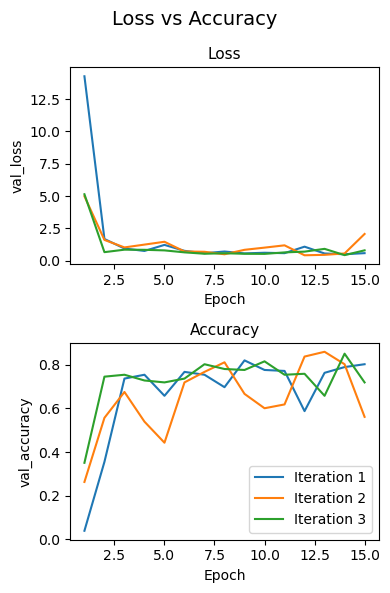

In [158]:
# Import data from CSV
data_csv = '../performance_data/train_perf/2024-11-19-conv3d-train-3layers.csv'
df = pd.read_csv(data_csv)

# Plot data
plot_iterations(df, "Loss vs Accuracy", orientation="v", w=4, h=6)

## Confusion matrix

                        precision    recall  f1-score   support

Asleep-Trying to sleep       0.78      0.39      0.52       583
          Doctor Visit       0.00      0.00      0.00        16
             EVS Visit       0.10      0.14      0.12        28
                Eating       0.00      0.00      0.00         1
                Family       1.00      0.72      0.84        92
          Lying In Bed       0.15      0.30      0.20        53
           Nurse Visit       0.16      0.15      0.15       163
 Sitting In Wheelchair       0.28      0.96      0.43        25
  Talking on the Phone       0.00      0.00      0.00        87
               Therapy       1.00      1.00      1.00         9
       Transfer To Bed       1.00      1.00      1.00         2
           Watching TV       0.05      0.17      0.08        47

              accuracy                           0.34      1106
             macro avg       0.38      0.40      0.36      1106
          weighted avg       0.54     

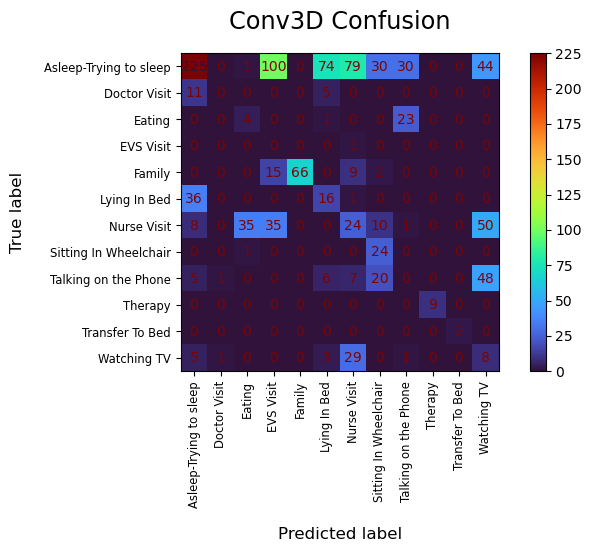

In [163]:
root = '../performance_data/test_perf'
data_csv = f'{root}/2024-11-18-12-58-19-conv3d-testing.csv'
df = pd.read_csv(data_csv)

cm = plot_confusion(t_class = df['Predicted class'], 
                    p_class = df['True class'],
                    display_labels = df['True class'].unique(), 
                    title = "Conv3D Confusion")

## I3D - Transfer learning

/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

Asleep-Trying to sleep       0.97      0.27      0.42      1058
          Doctor Visit       0.50      0.02      0.04        48
             EVS Visit       0.00      0.00      0.00         0
                Eating       0.00      0.00      0.00         0
                Family       0.00      0.00      0.00         0
          Lying In Bed       0.00      0.00      0.00         0
           Nurse Visit       0.00      0.00      0.00         0
 Sitting In Wheelchair       0.00      0.00      0.00         0
  Talking on the Phone       0.00      0.00      0.00         0
               Therapy       0.00      0.00      0.00         0
       Transfer To Bed       0.00      0.00      0.00         0
           Watching TV       0.00      0.00      0.00         0

              accuracy                           0.25      1106
             macro avg       0.12      0.02      0.04      1106
          weighted avg       0.95     

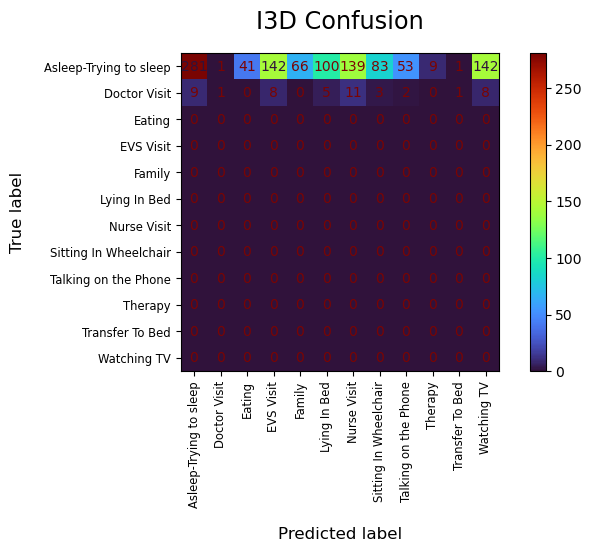

In [5]:
root = '../performance_data/test_perf'
data_csv = f'{root}/2024-11-21-05-26-56-i3d-transfer-test-all.csv'
df = pd.read_csv(data_csv)

cm = plot_confusion(t_class = df['Predicted class'], 
                    p_class = df['True class'],
                    display_labels = df['True class'].unique(), 
                    title = "I3D Confusion")